# Crime Prediction Model

## Introduction
This Jupyter Notebook demonstrates a machine learning model for predicting the likelihood of an individual committing a crime based on various socio-economic and psychological factors. 

We use multiple machine learning classifiers to determine the best-performing model. The dataset consists of generated data with features such as age, previous criminal record, mental health issues, education level, and other related attributes. The dataset is balanced using the **SMOTE (Synthetic Minority Over-sampling Technique)** to handle class imbalance.

## Data Preprocessing
1. Encoding categorical variables using **LabelEncoder**.
2. Splitting data into **training (80%) and testing (20%) sets**.
3. Applying **SMOTE** to balance the dataset.
4. Standardizing numerical features using **StandardScaler**.

In [62]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
np.random.seed(42)
n_samples = 50000  
data = {
    'suspicion_level': np.random.choice(['Low', 'Moderate', 'High'], n_samples),
    'previous_criminal_record': np.random.choice([0, 1], n_samples),
    'mental_state': np.random.choice(['Stable', 'Unstable'], n_samples),
    'forensic_evidence': np.random.choice([0, 1], n_samples), 
    'profession': np.random.choice(['Construction Worker', 'Unemployed', 'Office Worker', 'Engineer'], n_samples),
}

In [64]:
df = pd.DataFrame(data)

# Encoding categorical variables
label_encoders = {}
for col in ['suspicion_level', 'mental_state', 'profession']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


In [ ]:
def assign_crime_label(row):
    prob = 0.3 if row['suspicion_level'] == 0 else (0.5 if row['suspicion_level'] == 1 else 0.7)
    if row['previous_criminal_record']:
        prob += 0.2
    if row['forensic_evidence']:
        prob += 0.3
    if row['mental_state'] == 1:  
        prob += 0.1

    prob = min(max(prob, 0), 1)

    return np.random.choice([0, 1], p=[1 - prob, prob])


df['crime_committed'] = df.apply(assign_crime_label, axis=1)

In [66]:
# Define features and target
X = df.drop(columns=['crime_committed'])
y = df['crime_committed']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [69]:
# Standardize features for certain models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Models Used
We train and evaluate the following classifiers:

- **RandomForestClassifier**: An ensemble learning method that uses multiple decision trees to improve accuracy and reduce overfitting.
- **GradientBoostingClassifier**: Boosting algorithm that builds models sequentially to correct previous errors.
- **LogisticRegression**: A simple yet effective linear model for binary classification.
- **Support Vector Machine (SVM)**: A powerful classifier that finds the optimal hyperplane for separating classes.
- **K-Nearest Neighbors (KNN)**: A distance-based algorithm that classifies based on the majority vote of neighbors.
- **Multi-Layer Perceptron (MLP) Neural Network**: A deep learning model with hidden layers to capture complex patterns.


In [70]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=6),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

In [71]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 50)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Training RandomForest...
Accuracy of RandomForest: 0.6981
              precision    recall  f1-score   support

           0       0.41      0.82      0.55      2230
           1       0.93      0.66      0.77      7770

    accuracy                           0.70     10000
   macro avg       0.67      0.74      0.66     10000
weighted avg       0.81      0.70      0.72     10000

--------------------------------------------------
Training GradientBoosting...
Accuracy of GradientBoosting: 0.7162
              precision    recall  f1-score   support

           0       0.43      0.79      0.55      2230
           1       0.92      0.69      0.79      7770

    accuracy                           0.72     10000
   macro avg       0.67      0.74      0.67     10000
weighted avg       0.81      0.72      0.74     10000

--------------------------------------------------
Training LogisticRegression...
Accuracy of LogisticRegression: 0.7320
              precision    recall  f1-score   supp

In [ ]:
if best_model:
    joblib.dump(best_model, "crime_prediction_model.pkl")
    joblib.dump(scaler, "scaler.pkl") 
    print(f"Best model ({best_model.__class__.__name__}) saved with accuracy: {best_accuracy:.4f}")

Best model (KNeighborsClassifier) saved with accuracy: 0.7743


Evaluating RandomForest...
Accuracy: 0.6981
              precision    recall  f1-score   support

           0       0.41      0.82      0.55      2230
           1       0.93      0.66      0.77      7770

    accuracy                           0.70     10000
   macro avg       0.67      0.74      0.66     10000
weighted avg       0.81      0.70      0.72     10000



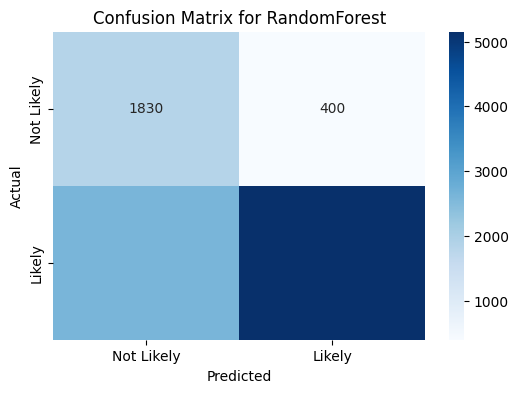

Evaluating GradientBoosting...
Accuracy: 0.7162
              precision    recall  f1-score   support

           0       0.43      0.79      0.55      2230
           1       0.92      0.69      0.79      7770

    accuracy                           0.72     10000
   macro avg       0.67      0.74      0.67     10000
weighted avg       0.81      0.72      0.74     10000



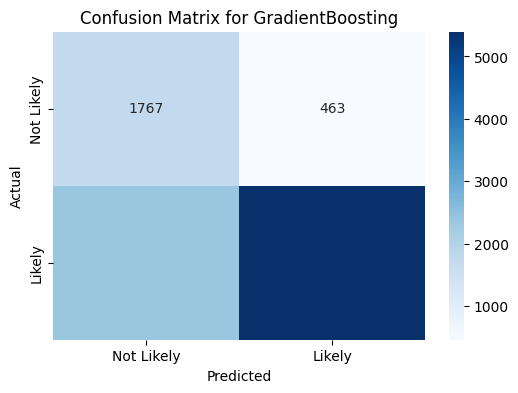

Evaluating LogisticRegression...
Accuracy: 0.7320
              precision    recall  f1-score   support

           0       0.44      0.74      0.55      2230
           1       0.91      0.73      0.81      7770

    accuracy                           0.73     10000
   macro avg       0.67      0.73      0.68     10000
weighted avg       0.80      0.73      0.75     10000



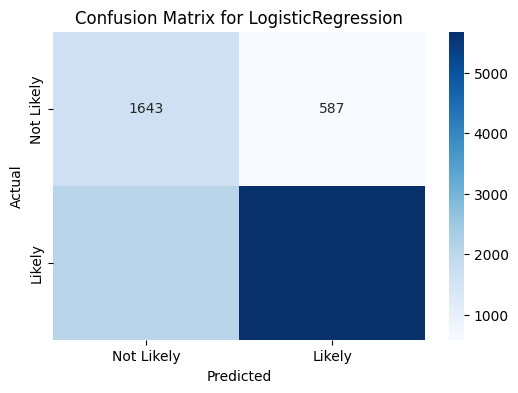

Evaluating KNN...
Accuracy: 0.7743
              precision    recall  f1-score   support

           0       0.49      0.43      0.46      2230
           1       0.84      0.87      0.86      7770

    accuracy                           0.77     10000
   macro avg       0.67      0.65      0.66     10000
weighted avg       0.76      0.77      0.77     10000



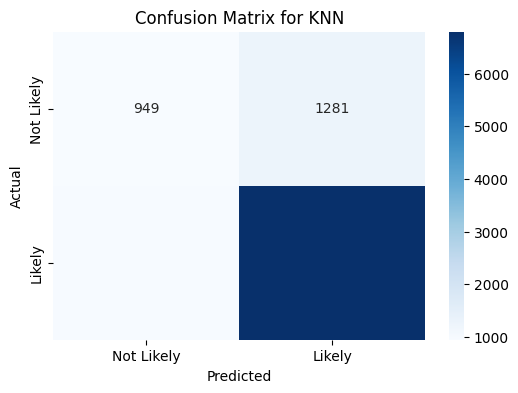

Evaluating NeuralNetwork...
Accuracy: 0.6918
              precision    recall  f1-score   support

           0       0.41      0.83      0.55      2230
           1       0.93      0.65      0.77      7770

    accuracy                           0.69     10000
   macro avg       0.67      0.74      0.66     10000
weighted avg       0.81      0.69      0.72     10000



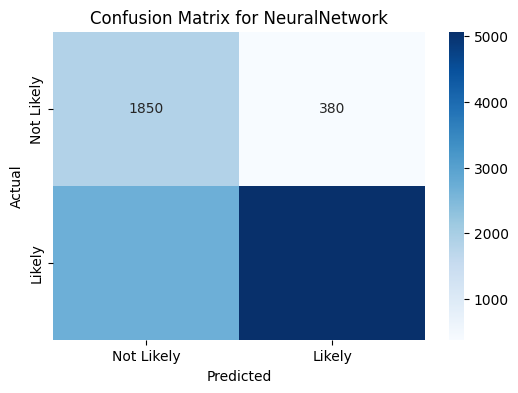

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Likely', 'Likely'], yticklabels=['Not Likely', 'Likely'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


## Conclusion
The accuracy and confusion matrix provide insights into how well each model predicts crime likelihood. 
After evaluation, the best-performing model will be integrated into the **Django REST API** for real-world applications.